## WeRateDog Data Wrangling

## 1. Gather

> 3 datasets have been gathered for using:
>> **twitter-archive-enhanced.csv**: pre collected by tutor. <br>
>> **tweet_json.txt**: collected missing 'retweet count'and 'favoraite count' for 1st dataset on TweetDataCollecting.ipynb. <br>
>> **image_predictions**: downloaded from online.

In [1]:
import tweepy
import json
import os
import pandas as pd
import numpy as np

In [2]:
# connect to tweet by using API
consumer_key = 'XXXXXXXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '892420643555336193.jpg',
 'data.txt',
 'dog_image',
 'image-predictions.tsv',
 'img_predic_master.csv',
 'master.txt',
 'name_predic',
 'name_predic.csv',
 'sample.jpg',
 'TweetDataCollecting.ipynb',
 'TweetImagePredictions.ipynb',
 'tweet_archive_master.csv',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'wrangle_act-Copy1.ipynb',
 'wrangle_act.ipynb']

In [4]:
# load twitter archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# downloading full data for each tweet id in existing twitter file
import json
import time
df_tweet_errors = []
start = time.time()
with open('tweet_json.txt','a') as outfile:
    for tweet in df_archive['tweet_id']:
        # write queried data to file tweet_json
        try:
            status = api.get_status(tweet)
            json.dump(status._json, outfile)
            outfile.write('\n')
        except Exception as e:
            # print tweet id that failed to be queried, review reason and store them in the other data frame
            print(str(tweet) + '_' + str(e))
            df_tweet_errors.append(tweet)
outfile.close()
end = time.time()

print(end - start)

888202515573088257_[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921_[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937_[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745_[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329_[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744_[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320_[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130_[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560_[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705_[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984_[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648_[{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778_[{'code': 144, 'message': 'No sta

Rate limit reached. Sleeping for: 702


754011816964026368_[{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288_[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 702


1931.8820986747742


In [7]:
# load tweet json data, retweet count/favoraite count from txt to dataframe
data = []

with open('tweet_json.txt', 'r') as infile:
    for line in infile:
        in_status = json.loads(line)
        data.append(in_status)

df_missing = pd.DataFrame(data)

In [8]:
# take a look of df_missing
df_missing.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,35016,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,30322,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,22797,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,38284,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,36560,False,False,False,False,en,NaN,NaN,NaN,NaN


In [9]:
# only keep columns in missing data that will be used further
df_missing = df_missing[['id','retweet_count','favorite_count']]

In [10]:
# get all urls
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_predic = pd.read_csv(url, sep='\t')

In [11]:
df_predic

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## 2. Assess

### (a)Tidiness
- 1) df_missing (i.e. retweet count and favoraite count) is part of df_archive
- 2) df_archive source column has mixed hyperlink and text
- 3) df_archive 'doggo, floofer, pupper, puppo' should be 1 variable in 1 column

### (b) Quality
- 4) df_archive, columns in_reply_to_status_id and in_reply_to_user_id are a lot empty, which will not be used 
- 5) df_archive, not all data is original, retweets are included
- 6) df_predic has 2075 rows while df_archive has 2356 rows, df_archive has columns without images
- 7) In both datasets, all ids should be string instead of float
- 8) df_archive, timestamp should be converted to date and time instead of string
- 9) df_archive, name has lots of 'None' and 'a', which seem to be null value
- 10) df_archive, when there are 2 fractions, it usually selects the first one but the second one is correct
- 11) df_archive, names in p1, p2, p3 are partially capitalized, need to be standardized

In [12]:
# check completeness of both dataset
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> Conclusion: <br>
there are quite some empty rows in columns, in_reply_to_status_id and in_reply_to_user_id will not be used. <br>
retweets are duplicates, which are not needed. <br>
doggo, floofer, pupper, puppo are 1 variable stage, which should be in 1 column.

In [13]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              4662 non-null   int64
 1   retweet_count   4662 non-null   int64
 2   favorite_count  4662 non-null   int64
dtypes: int64(3)
memory usage: 109.4 KB


> Conclusion: df_missing should be part of df_archive

In [14]:
# check data type of each column
for i in df_archive.columns:
    print(str(i) + '_' + str(type(df_archive[i].iloc[1])))

tweet_id_<class 'numpy.int64'>
in_reply_to_status_id_<class 'numpy.float64'>
in_reply_to_user_id_<class 'numpy.float64'>
timestamp_<class 'str'>
source_<class 'str'>
text_<class 'str'>
retweeted_status_id_<class 'numpy.float64'>
retweeted_status_user_id_<class 'numpy.float64'>
retweeted_status_timestamp_<class 'float'>
expanded_urls_<class 'str'>
rating_numerator_<class 'numpy.int64'>
rating_denominator_<class 'numpy.int64'>
name_<class 'str'>
doggo_<class 'str'>
floofer_<class 'str'>
pupper_<class 'str'>
puppo_<class 'str'>


> Conclusion: id, timestamp data types are not correct

In [15]:
for a in df_missing.columns:
    print(str(a) + '_' + str(type(df_missing[a].iloc[1])))

id_<class 'numpy.int64'>
retweet_count_<class 'numpy.int64'>
favorite_count_<class 'numpy.int64'>


In [16]:
# check accuracy of datasets
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> Conclusion: source is mixed with 2 variables, link and source

In [17]:
df_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Monster      1
Vinnie       1
Ralphus      1
Divine       1
Tessa        1
Name: name, Length: 957, dtype: int64

In [18]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
df_archive[df_archive['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


> Conclusion: rating_denominator is 0 while numerator is 960 which is incorrect according to text

In [20]:
df_archive[df_archive['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [21]:
df_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Monster      1
Vinnie       1
Ralphus      1
Divine       1
Tessa        1
Name: name, Length: 957, dtype: int64

> Conclusion: None and a seem to be default values which are not correct

In [22]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> Conclusion: we see most of rating_denominators are 2333, it's highly possible the rest contains mistakes.

In [23]:
df_archive[df_archive['rating_denominator']!=10][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


> Conclusion: when there are 2 fractions, it usually selects the first one but the second one is more correct.

In [24]:
df_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_predic['tweet_id'].duplicated().sum()

0

In [26]:
sum(df_archive['tweet_id'].isin(df_predic['tweet_id']))

2075

> Conclusion: df_predic has 2075 rows while df_archive has 2356 rows, df_archive has columns without images

In [27]:
df_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
df_predic.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
df_predic['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
long-horned_beetle      1
cowboy_boot             1
candle                  1
alp                     1
tailed_frog             1
Name: p1, Length: 378, dtype: int64

In [30]:
df_predic['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
peacock                 1
giant_panda             1
junco                   1
saltshaker              1
rifle                   1
Name: p2, Length: 405, dtype: int64

In [31]:
df_predic['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
cowboy_boot            1
electric_fan           1
great_grey_owl         1
rifle                  1
chime                  1
Name: p3, Length: 408, dtype: int64

> Conclusion: names in df_predic p1, p2, p3 are partially capitalized, need to be standardized

## 3. Clean

In [32]:
# copy all datasets
archive_clean = df_archive.copy()
missing_clean = df_missing.copy()
predic_clean = df_predic.copy()

1) df_missing (i.e. retweet count and favoraite count) is part of df_archive 

*Define*<br>
> merge 2 datasets into one <br>

*Code*

In [33]:
# rename missing_clean id column as tweet_id, the same with archive_clean tweet_id
missing_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [34]:
archive_clean = pd.merge(archive_clean, missing_clean, on ='tweet_id', how='left')

*Test* 

In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4687 entries, 0 to 4686
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    4687 non-null   int64  
 1   in_reply_to_status_id       156 non-null    float64
 2   in_reply_to_user_id         156 non-null    float64
 3   timestamp                   4687 non-null   object 
 4   source                      4687 non-null   object 
 5   text                        4687 non-null   object 
 6   retweeted_status_id         344 non-null    float64
 7   retweeted_status_user_id    344 non-null    float64
 8   retweeted_status_timestamp  344 non-null    object 
 9   expanded_urls               4569 non-null   object 
 10  rating_numerator            4687 non-null   int64  
 11  rating_denominator          4687 non-null   int64  
 12  name                        4687 non-null   object 
 13  doggo                       4687 

2) df_archive source column has mixed hyperlink and text

*Define*<br>
> seperate hyperlink and text from source columns as 2 variables <br>

*Code* 

In [36]:
# extract link and rename it
archive_clean['source_link'] = archive_clean['source'].str.extract(('<a href="([\s\w=":/\.?]*)"\s'), expand=True)

In [37]:
# extract text and rename it
archive_clean['source_text'] = archive_clean['source'].str.extract(('>(.*)</a>'), expand=True)

In [38]:
# drop original source column
archive_clean.drop('source', axis= 1, inplace= True)

*Test* 

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4687 entries, 0 to 4686
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    4687 non-null   int64  
 1   in_reply_to_status_id       156 non-null    float64
 2   in_reply_to_user_id         156 non-null    float64
 3   timestamp                   4687 non-null   object 
 4   text                        4687 non-null   object 
 5   retweeted_status_id         344 non-null    float64
 6   retweeted_status_user_id    344 non-null    float64
 7   retweeted_status_timestamp  344 non-null    object 
 8   expanded_urls               4569 non-null   object 
 9   rating_numerator            4687 non-null   int64  
 10  rating_denominator          4687 non-null   int64  
 11  name                        4687 non-null   object 
 12  doggo                       4687 non-null   object 
 13  floofer                     4687 

In [40]:
archive_clean['source_link'].value_counts()

http://twitter.com/download/iphone              4418
http://vine.co                                   182
http://twitter.com                                66
https://about.twitter.com/products/tweetdeck      21
Name: source_link, dtype: int64

In [41]:
archive_clean['source_text'].value_counts()

Twitter for iPhone     4418
Vine - Make a Scene     182
Twitter Web Client       66
TweetDeck                21
Name: source_text, dtype: int64

3) df_archive 'doggo, floofer, pupper, puppo' should be 1 variable in 1 column

*Define*<br>
> merge columns doggo, floofer, pupper, puppo into 1 column and change type to category<br>

*Code*

In [42]:
# replace all none with empty values
archive_clean[['doggo','floofer','pupper','puppo']]=archive_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: x.replace('None',''))

In [43]:
# concat doggo, floofer, pupper, puppo columns to stage
archive_clean['stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [44]:
# replace double values to readble values
archive_clean['stage'].replace('doggopupper','doggo, pupper', inplace=True)
archive_clean['stage'].replace('doggopuppo','doggo, puppo', inplace=True)
archive_clean['stage'].replace('doggofloofer','doggo, floofer', inplace=True)

In [45]:
# drop doggo, floofer, puppo, pupper column
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [46]:
# change stage to type category
archive_clean['stage'].astype('category')

0        
1        
2        
3        
4        
       ..
4682     
4683     
4684     
4685     
4686     
Name: stage, Length: 4687, dtype: category
Categories (8, object): ['', 'doggo', 'doggo, floofer', 'doggo, pupper', 'doggo, puppo', 'floofer', 'pupper', 'puppo']

*Test*

In [47]:
archive_clean['stage'].value_counts()

                  3932
pupper             488
doggo              163
puppo               58
doggo, pupper       24
floofer             18
doggo, floofer       2
doggo, puppo         2
Name: stage, dtype: int64

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4687 entries, 0 to 4686
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    4687 non-null   int64  
 1   in_reply_to_status_id       156 non-null    float64
 2   in_reply_to_user_id         156 non-null    float64
 3   timestamp                   4687 non-null   object 
 4   text                        4687 non-null   object 
 5   retweeted_status_id         344 non-null    float64
 6   retweeted_status_user_id    344 non-null    float64
 7   retweeted_status_timestamp  344 non-null    object 
 8   expanded_urls               4569 non-null   object 
 9   rating_numerator            4687 non-null   int64  
 10  rating_denominator          4687 non-null   int64  
 11  name                        4687 non-null   object 
 12  retweet_count               4662 non-null   float64
 13  favorite_count              4662 

4) df_archive, columns in_reply_to_status_id and in_reply_to_user_id are a lot empty, which will not be used

*Define*<br>
> drop these columns from archive_clean dataset <br>

*Code*

In [49]:
# these columns will not be used, therefore will be dropped from archive dataset
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1, inplace=True)

*Test*

In [50]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4687 entries, 0 to 4686
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    4687 non-null   int64  
 1   timestamp                   4687 non-null   object 
 2   text                        4687 non-null   object 
 3   retweeted_status_id         344 non-null    float64
 4   retweeted_status_user_id    344 non-null    float64
 5   retweeted_status_timestamp  344 non-null    object 
 6   expanded_urls               4569 non-null   object 
 7   rating_numerator            4687 non-null   int64  
 8   rating_denominator          4687 non-null   int64  
 9   name                        4687 non-null   object 
 10  retweet_count               4662 non-null   float64
 11  favorite_count              4662 non-null   float64
 12  source_link                 4687 non-null   object 
 13  source_text                 4687 

5) df_archive, not all data is original, retweets are included

*Define*<br>
> retweets will be dropped <br>

*Code*

In [51]:
# find all retweets
duplicates = archive_clean[archive_clean['retweeted_status_id'].isnull()==False]
duplicates.count()

tweet_id                      344
timestamp                     344
text                          344
retweeted_status_id           344
retweeted_status_user_id      344
retweeted_status_timestamp    344
expanded_urls                 342
rating_numerator              344
rating_denominator            344
name                          344
retweet_count                 326
favorite_count                326
source_link                   344
source_text                   344
stage                         344
dtype: int64

In [52]:
# drop retweets in rows
archive_clean.drop(duplicates.index, axis=0, inplace=True)

In [53]:
# drop retweets in columns as they are all empty columns
archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

*Test*

In [54]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4343 entries, 0 to 4686
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            4343 non-null   int64  
 1   timestamp           4343 non-null   object 
 2   text                4343 non-null   object 
 3   expanded_urls       4227 non-null   object 
 4   rating_numerator    4343 non-null   int64  
 5   rating_denominator  4343 non-null   int64  
 6   name                4343 non-null   object 
 7   retweet_count       4336 non-null   float64
 8   favorite_count      4336 non-null   float64
 9   source_link         4343 non-null   object 
 10  source_text         4343 non-null   object 
 11  stage               4343 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 441.1+ KB


6) df_predic has 2075 rows while df_archive has 2356 rows, df_archive has columns without images

*Define*<br>
> drop tweet_id in archive_clean while it has no images in predic_clean and tweet_id in archive_clean while there is no record <br>

*Code* 

In [55]:
# check if any rows in archive has no image in predic
no_image = archive_clean[archive_clean['tweet_id'].isin(predic_clean['tweet_id'])==False]

In [56]:
# drop these rows in archive
archive_clean.drop(no_image.index, axis=0, inplace=True)

In [57]:
# check if any rows in predic has no records in archive
no_archive = predic_clean[predic_clean['tweet_id'].isin(archive_clean['tweet_id'])==False]

In [58]:
no_archive.count()

tweet_id    81
jpg_url     81
img_num     81
p1          81
p1_conf     81
p1_dog      81
p2          81
p2_conf     81
p2_dog      81
p3          81
p3_conf     81
p3_dog      81
dtype: int64

In [59]:
# drop these rows
predic_clean.drop(no_archive.index, axis=0, inplace=True)

*Test*

In [60]:
sum(archive_clean['tweet_id'].isin(predic_clean['tweet_id'])==False)

0

In [61]:
sum(predic_clean['tweet_id'].isin(archive_clean['tweet_id'])==False)

0

7) In both datasets, all ids should be string instead of float

*Define*<br>
> convert id from float to string <br>

*Code* 

In [62]:
# convert id to str
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')

In [63]:
# convert id to str
predic_clean['tweet_id'] = predic_clean['tweet_id'].astype('str')

*Test* 

In [64]:
type(archive_clean['tweet_id'].iloc[1]), type(predic_clean['tweet_id'].iloc[1])

(str, str)

8) df_archive, timestamp should be converted to date and time instead of string

*Define*<br>
> convert timestamp from string to datetime and seperate them <br>

*Code* 

In [65]:
# convert timestamp to datetime format
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], errors='raise')

*Test* 

In [66]:
type(archive_clean['timestamp'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

9) df_archive, name has lots of 'None' and 'a', which seem to be default value

*Define*<br>
> convert name 'None' and 'a' to real none <br>

*Code* 

In [67]:
# change none and a in names to null
archive_clean['name'].replace('None', np.nan, inplace = True)

In [68]:
archive_clean['name'].replace('a', np.nan, inplace = True)

*Test* 

In [69]:
archive_clean.query('name in ["None","a"]')['tweet_id'].sum()

0

10) when there are 2 fractions, it usually selects the first one but the second one is correct

*Define*<br>
> for rating_denominator !=10 group, if there are 2 groups of fractions in text, select the second group.<br>

*Code*

In [70]:
# find rating_denominator !=10 group
rating_correct = archive_clean[archive_clean['rating_denominator']!=10]

In [71]:
# find second fractions in text
new_rating = rating_correct['text'].str.extractall('((?:\d+\.)?\d+)\/(\d+)').xs(1, level=1)

In [72]:
# reassign values
archive_clean.loc[new_rating.index] = archive_clean.loc[new_rating.index].assign(rating_numerator = new_rating[0])

In [73]:
# reassign values
archive_clean.loc[new_rating.index] = archive_clean.loc[new_rating.index].assign(rating_denominator = new_rating[1])

*Test*

In [74]:
archive_clean.loc[new_rating.index][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
2112,14,10
2113,14,10
2306,13,10
2307,13,10
2380,11,10
2381,11,10
3300,10,10
3301,10,10
4645,9,10
4646,9,10


In [75]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3981 entries, 0 to 4686
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            3981 non-null   object             
 1   timestamp           3981 non-null   datetime64[ns, UTC]
 2   text                3981 non-null   object             
 3   expanded_urls       3981 non-null   object             
 4   rating_numerator    3981 non-null   object             
 5   rating_denominator  3981 non-null   object             
 6   name                2779 non-null   object             
 7   retweet_count       3974 non-null   float64            
 8   favorite_count      3974 non-null   float64            
 9   source_link         3981 non-null   object             
 10  source_text         3981 non-null   object             
 11  stage               3981 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [76]:
# change types of ratings from object to int
archive_clean[['rating_numerator','rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype('int')

In [77]:
archive_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,3981.000000,3981.000000,3974.000000,3974.000000
mean,12.273801,10.510927,2349.697282,7998.982637
std,41.519063,7.266962,4203.908989,11781.594922
min,0.000000,7.000000,11.000000,69.000000
25%,10.000000,10.000000,527.000000,1706.000000
50%,11.000000,10.000000,1137.000000,3616.000000
75%,12.000000,10.000000,2676.250000,9927.000000
max,1776.000000,170.000000,74277.000000,150545.000000


11) df_predic, names in p1, p2, p3 are partially capitalized, need to be standardized

*Define*<br>
> change names in p1, p2, p3 to non-capitalized <br>

*Code*

In [78]:
# change predicted breeds to lower case
predic_clean['p1'] = predic_clean['p1'].str.lower()
predic_clean['p2'] = predic_clean['p2'].str.lower()
predic_clean['p3'] = predic_clean['p3'].str.lower()

*Test*

In [79]:
name_clean = predic_clean['p1'].append(predic_clean['p2']).append(predic_clean['p3'])
name_clean.value_counts()

labrador_retriever    267
golden_retriever      267
chihuahua             179
pembroke              139
cardigan              113
                     ... 
breakwater              1
academic_gown           1
carousel                1
upright                 1
chime                   1
Length: 628, dtype: int64

In [80]:
predic_clean.to_csv('img_predic_master.csv')
archive_clean.to_csv('tweet_archive_master.csv')

## 4. EDA

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
plt.style.use('ggplot')
sns.set_style('white')

In [83]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3981 entries, 0 to 4686
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            3981 non-null   object             
 1   timestamp           3981 non-null   datetime64[ns, UTC]
 2   text                3981 non-null   object             
 3   expanded_urls       3981 non-null   object             
 4   rating_numerator    3981 non-null   int32              
 5   rating_denominator  3981 non-null   int32              
 6   name                2779 non-null   object             
 7   retweet_count       3974 non-null   float64            
 8   favorite_count      3974 non-null   float64            
 9   source_link         3981 non-null   object             
 10  source_text         3981 non-null   object             
 11  stage               3981 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [84]:
# look at distribution by source
by_source = archive_clean.groupby(['source_text'])['tweet_id'].count()
source_portion = by_source/by_source.sum()
df_source = pd.DataFrame(source_portion)
df_source['number'] = by_source

# rename column names
df_source.rename(columns={'tweet_id':'proportion'},inplace=True)
df_source

,proportion,number
source_text,,
TweetDeck,0.005275,21
Twitter Web Client,0.014067,56
Twitter for iPhone,0.980658,3904


,proportion,number
source_text,,
TweetDeck,0.005275,21
Twitter Web Client,0.014067,56
Twitter for iPhone,0.980658,3904


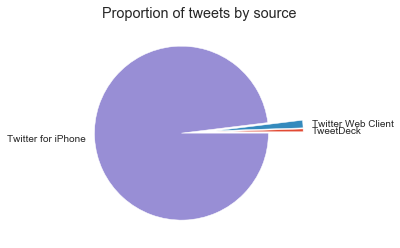

In [85]:
# visualize table above
plt.pie(df_source['proportion'], explode=[0.20]*3, labels=df_source.index)
plt.title('Proportion of tweets by source')
df_source

> Conclusion: most of tweets are sent from iphone (98%), some portions are web client (1.4%), the last is tweet deck (0.5%).

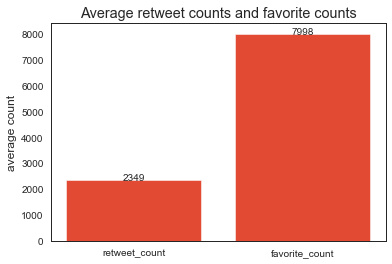

In [86]:
# visualize retweet counts and favorite counts
num_tweets = archive_clean[['retweet_count','favorite_count']].mean()
plt.bar(num_tweets.index,num_tweets.values)
plt.title('Average retweet counts and favorite counts')
plt.ylabel('average count')
for a in range(num_tweets.shape[0]):
    perc = num_tweets.values[a]
    plt.text(a, perc, '{:d}'.format(int(perc)),ha='center')

> Conclusion: on average 2350 retweets and 8001 favorite counts per tweet.

In [87]:
# calculate retweet_count, favorite_count by month
year_date = archive_clean['timestamp'].dt.to_period('M').astype('str')
by_date = archive_clean.groupby(year_date.values).agg({'tweet_id':'count',
                                                      'retweet_count':'sum',
                                                      'favorite_count': 'sum'})

C:\Users\xjuan\Anaconda3\envs\myenv\lib\site-packages\pandas\core\arrays\datetimes.py:1089: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [88]:
by_date

,tweet_id,retweet_count,favorite_count
2015-11,592,275164.0,671665.0
2015-12,733,928670.0,2289208.0
2016-01,338,432332.0,1197998.0
2016-02,222,302461.0,855842.0
2016-03,240,331527.0,975208.0
2016-04,108,147268.0,456517.0
2016-05,114,211690.0,634559.0
2016-06,162,600226.0,1528301.0
2016-07,175,370030.0,1097679.0
2016-08,118,364226.0,1083003.0


Text(0.5, 0, 'month')

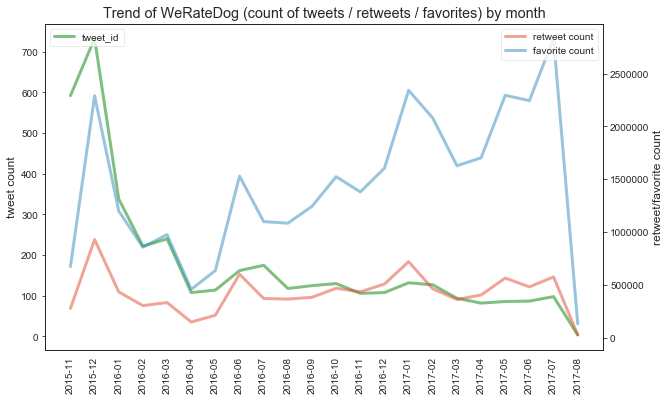

In [89]:
# visualize retweet_count and favorite_count by month
ax = by_date['tweet_id'].plot(kind='line', color='g', lw=3, alpha = 0.5, figsize=(10,6))
ax.legend(loc = 2)
ax.set_ylabel('tweet count')

ax2 = ax.twinx()
ax2.plot(by_date[['retweet_count','favorite_count']], lw=3, alpha=0.5,)
ax2.legend(['retweet count','favorite count'], loc=1)
ax2.set_ylabel('retweet/favorite count')

ax.set_xticklabels(by_date.index, rotation = 90)
plt.title('Trend of WeRateDog (count of tweets / retweets / favorites) by month')
plt.xlabel('month')

In [90]:
# average number of retweets and favorites by month
by_date['avg_retweet'] = by_date['retweet_count'] / by_date['tweet_id']
by_date['avg_favorite'] = by_date['favorite_count'] / by_date['tweet_id']

Text(0, 0.5, 'count')

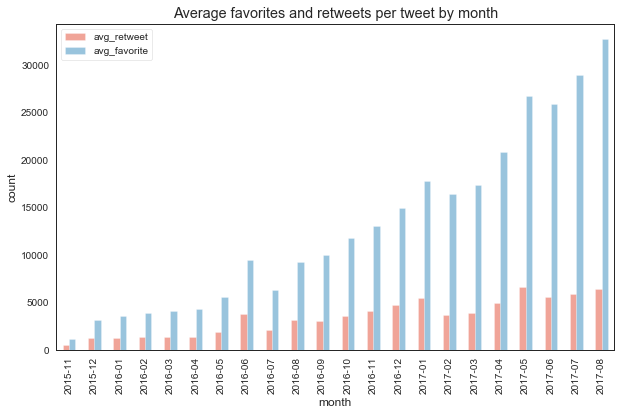

In [91]:
# visualize average number of retweets and favorites by month
by_date[['avg_retweet','avg_favorite']].plot(kind='bar', figsize=(10,6), alpha=0.5)
plt.title('Average favorites and retweets per tweet by month')
plt.xlabel('month')
plt.ylabel('count')

In [92]:
predic_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


> Conclusion: although with time WeRateDog sends fewer tweets per month while each tweet is getting more favorites and retweets.

In [93]:
# get the most confident prediction from predic dataset
predic_conf = []
predic_img = []
predic_dog = []
predic_clean_2 = predic_clean.drop('img_num', axis=1)
for a in np.arange(predic_clean_2.shape[0]):
    conf_ = max(predic_clean_2['p1_conf'].iloc[a], predic_clean_2['p2_conf'].iloc[a], predic_clean_2['p3_conf'].iloc[a])
    predic_conf.append(conf_)
    
    b = (predic_clean_2.iloc[a] == conf_)
    get_img = b.index[b.argmax()][0:2]
    img_ = predic_clean_2[get_img].iloc[a]
    predic_img.append(img_)
    
    dog_ = predic_clean_2[get_img + '_dog'].iloc[a]
    predic_dog.append(dog_)

In [94]:
# put them to predic dataset
predic_clean_2['conf_'] = predic_conf
predic_clean_2['img_'] = predic_img
predic_clean_2['dog_'] = predic_dog

In [95]:
predic_clean_2.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,conf_,img_,dog_
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,0.465074,welsh_springer_spaniel,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,0.506826,redbone,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461,german_shepherd,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143,rhodesian_ridgeback,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,0.560311,miniature_pinscher,True


In [96]:
# get top predictions and its average confidence
by_breed = predic_clean_2[predic_clean_2['dog_'] == True].groupby('img_').agg({'tweet_id':'count',
                                                                              'conf_':'mean'})
by_breed.rename(columns={'tweet_id':'count'},inplace=True)

In [97]:
pd.DataFrame(by_breed.sort_values(by='count',axis=0, ascending=False).head(10))

,count,conf_
img_,,
golden_retriever,139,0.721001
labrador_retriever,95,0.659139
pembroke,88,0.717223
chihuahua,79,0.588905
pug,54,0.759223
chow,41,0.615648
samoyed,40,0.747088
toy_poodle,38,0.612641
pomeranian,38,0.743606


Text(0, 0.5, 'count')

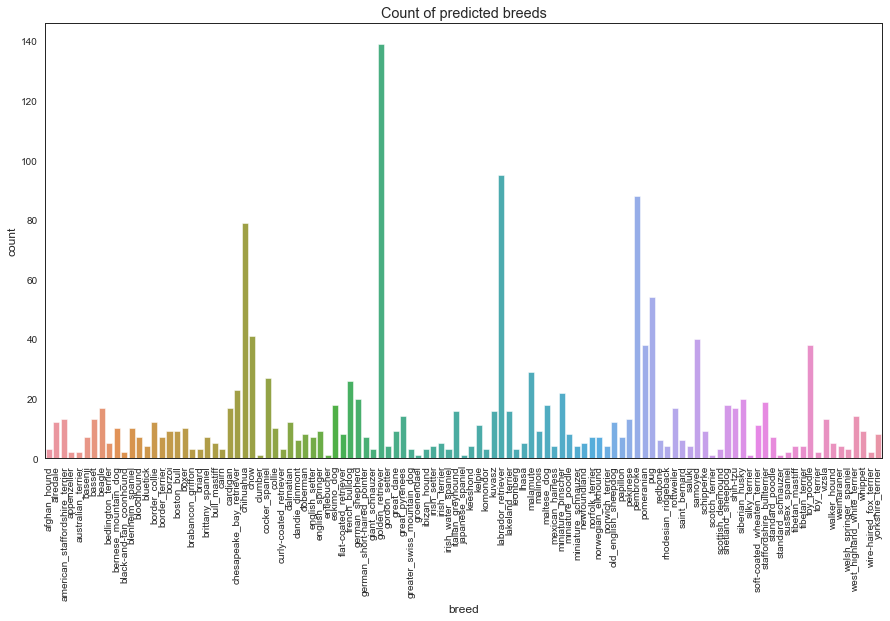

In [98]:
# visualize top predictions
plt.subplots(figsize=(15,8))
sns.barplot(x=by_breed.index, y=by_breed['count'].values)
plt.xticks(rotation=90)
plt.title('Count of predicted breeds')
plt.xlabel('breed')
plt.ylabel('count')

> Conclusion: top 1 predicted breed is golden retriever with average confidence of 0.72, the second is labrador_retriever with 0.65 confidence.